# Getting data
 In this section we will get data from text file

# Using command line in notebook
One can check the operating system and run commands from within a notebook.

In [1]:
# check the files in the directory we are in
%ls 

 Volume in drive C has no label.
 Volume Serial Number is C0B9-E0BE

 Directory of C:\Users\dell

04/12/2020  11:43 PM    <DIR>          .
04/12/2020  11:43 PM    <DIR>          ..
09/30/2019  12:34 PM    <DIR>          .anaconda
04/12/2020  11:43 PM    <DIR>          .conda
04/12/2020  09:37 PM                43 .condarc
09/30/2019  12:35 PM    <DIR>          .continuum
09/21/2019  12:20 PM    <DIR>          .dotnet
04/06/2020  09:02 PM    <DIR>          .ipynb_checkpoints
10/03/2019  04:51 PM    <DIR>          .ipython
10/11/2019  01:33 PM    <DIR>          .jupyter
10/27/2019  02:18 PM    <DIR>          .matplotlib
03/13/2020  02:07 PM    <DIR>          3D Objects
11/06/2019  09:02 PM    <DIR>          Anaconda3
04/12/2020  11:17 PM            40,370 arabic Sentiment Analysis.ipynb
04/09/2020  01:25 AM             5,537 arabicNegative.txt
04/09/2020  01:31 AM             4,279 arabicPositive.txt
04/12/2020  11:43 PM               561 arabicSong.txt
03/13/2020  02:07 PM    <DIR>     


# Opening and Reading a Text File
Once we know where a file is we can open it. Here we will get a text online, copy it and save it as a text file for use.
* Get a song script online
* Create a text file in Jupyter, paste it in, and save it.
* Check if the file is there.
Here is some code to load text.


In [2]:
import matplotlib.pyplot as plt
import nltk
import re

# make sure that graphs are embedded into our notebook output
%matplotlib inline
with open("MyTranslation.txt", "r") as file:
    script = file.read()
    
# And we can check what we got.
print(script)

O dearest and humiliated me
How to reach me and show me
It was you who swore on me and swore to me
I swore that you did not betray me, you guessed me
You swore that you are not inclined to fancy
Where is the right and where do you pledge to me?
Hiran left me wandering
Take care of the stars while you live easy
To sit on the road and complain
I say wronged and you wronged me
And to pray for you in the twilight of Dja
God bless you just as you did me



In [3]:
script # Read the script (without existing of new line).

'O dearest and humiliated me\nHow to reach me and show me\nIt was you who swore on me and swore to me\nI swore that you did not betray me, you guessed me\nYou swore that you are not inclined to fancy\nWhere is the right and where do you pledge to me?\nHiran left me wandering\nTake care of the stars while you live easy\nTo sit on the road and complain\nI say wronged and you wronged me\nAnd to pray for you in the twilight of Dja\nGod bless you just as you did me\n'

# Cleaning the Script
* Lower all words.
* Splitting the script into words.
* Remove all new lines ("\n", "\r") and stop words. 

Ps. Before removing the stopwords you need to download them from nltk library.

In [4]:
nltk.download('stopwords') # Download the English stopwords like I, and, now...etc.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

script = script.lower() # Lower all words.

script=re.sub(r'\n'," ", script) # Remove all new lines

script=re.sub(r'\d'," ", script) # Remove all numbers

# now we will remove all apostrophes " ' "
script = script. replace ("â€™", "'"). replace("can't", "cannot").replace("n't", " not").\
replace("'d", " would").replace("'ve", " have")\
.replace("'ll", " will").replace("'", " ")
 
tokensLow = nltk.word_tokenize(script) # Split the script into words.

wordTokensLow = [word for word in tokensLow if word[0].isalpha()] # Check if these words are English words.

stopwords = nltk.corpus.stopwords.words("English") # Get a list of English stop words.

contentWordTokensLow = [word for word in wordTokensLow if word not in stopwords] # Check if the word is not in stop words list

contentWordTokensLow # print the result

['dearest',
 'humiliated',
 'reach',
 'show',
 'swore',
 'swore',
 'swore',
 'betray',
 'guessed',
 'swore',
 'inclined',
 'fancy',
 'right',
 'pledge',
 'hiran',
 'left',
 'wandering',
 'take',
 'care',
 'stars',
 'live',
 'easy',
 'sit',
 'road',
 'complain',
 'say',
 'wronged',
 'wronged',
 'pray',
 'twilight',
 'dja',
 'god',
 'bless']

# Word Frequencies
Save the results in a Python Dictionary

In [6]:
contentWordTokensLowFreq = nltk.FreqDist(contentWordTokensLow) # Frequency Distribution
contentWordTokensLowFreq # Show the words with their frequencies

FreqDist({'swore': 4, 'wronged': 2, 'dearest': 1, 'humiliated': 1, 'reach': 1, 'show': 1, 'betray': 1, 'guessed': 1, 'inclined': 1, 'fancy': 1, ...})

In [7]:
contentWordTokensLowFreq.tabulate(10) # the top 10 high frequency words

     swore    wronged    dearest humiliated      reach       show     betray    guessed   inclined      fancy 
         4          2          1          1          1          1          1          1          1          1 


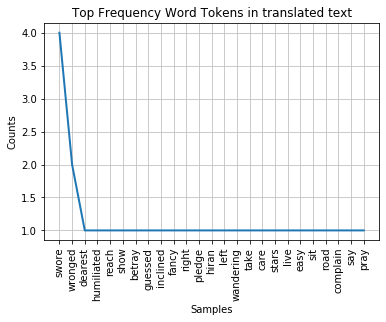

In [8]:
contentWordTokensLowFreq.plot(25, title="Top Frequency Word Tokens in translated text") # Plotting the top 10 high frequency words

# Sentiment Analysis
* We got one text file of positive words from GitHub.
* We got one text file of negative words from GitHub.
<br> 
We will read them and use them as lists of positive and negative words.

In [9]:
with open("EnglishPositive.txt", "r") as file:
    posText = file.read()

with open("EnglishNegative.txt", "r") as file:
    negText = file.read()

posWords = nltk.word_tokenize(posText.lower())
negWords = nltk.word_tokenize(negText.lower())

print(posWords[1:5])
print(negWords[1:10])

['abound', 'abounds', 'abundance', 'abundant']
['2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


## Calculating positive and negative words

Now we will create function that counts the number of positive or negative words. The idea is that we pass the function a list of tokens (of the text) and a list of words that have emotions (positive or neagtive words). It counts how many emotion words are in the list of tokens.

In [10]:
# Function that counts how many target words are in a list of tokens
def countSentimentalTokens(listOfTokens,listOfTargetWords):
    numTargetWords = 0
    matchedWords = []
    for token in listOfTokens: # Goes through the tokens in the list
        if token in listOfTargetWords: # For each one it checks if it is in the target list
            numTargetWords += 1
            matchedWords.append(token)
    return numTargetWords, matchedWords # Note that we are returning a tuple (2 values)

thePositive = countSentimentalTokens(contentWordTokensLow,posWords)
print("The number of positive words are " + str(thePositive[0]) + " and the positive words are: \n\n " + str(thePositive[1]))

theNegative = countSentimentalTokens(contentWordTokensLow,negWords)
print("\n\n The number of negativetive words are " + str(theNegative[0]) + " and the negative words are: \n\n " + str(theNegative[1]))

The number of positive words are 8 and the positive words are: 

 ['dearest', 'reach', 'fancy', 'right', 'live', 'easy', 'pray', 'bless']


 The number of negativetive words are 6 and the negative words are: 

 ['humiliated', 'betray', 'left', 'complain', 'wronged', 'wronged']


## Calculating percentage of positive and negative words

Now we can calculate the percentages of postive and negative words.

In [11]:
def calculatePercent(listOfTokens,positiveList,negativeList):
    numWords = len(listOfTokens) # How many words in the English translation
    
    # We call the function to count the tokens from the positive words exist in the text
    positiveMatches = countSentimentalTokens(listOfTokens,positiveList) 
    percntPos = positiveMatches[0] / numWords # We divide by the total number of words for percentage
    
    # We call the function to count the tokens from the negative words exist in the text 
    negativeMatches = countSentimentalTokens(listOfTokens,negativeList)
    percntNeg = negativeMatches[0] / numWords # We divide by the total number of words for percentage

    return percntPos, percntNeg # We return the percentage of positive and negative words

# We test the function on the first sentence
results = calculatePercent(tokensLow,posWords,negWords)
print("Positive: " + "{:.0%}".format(results[0]) + "  Negative: " + "{:.0%}".format(results[1]))

Positive: 8%  Negative: 6%


## Calculate sentiment

Here we calculate whether a sentence is positive or negative.

In [12]:
def calculateSentiment(percntPos,percntNeg):
    sentiment = percntPos - percntNeg # Subtract the percentage of negative words from positive words
    return sentiment

# Test what we get
calculateSentiment(results[0],results[1])
# If the result is 0, then the text is neutral
# If the result is more than 0, then the text is positive
# If the result is less than 0, then the text is negative

0.019801980198019806